# Simulating the DDM reflecting model with stimulus duration 50 ms
In this document, the perfect integrator model, the drift diffusion absorbing model and the drift diffusion reflecting model will be simulated and the parameters of each one will be changed in order to understand the role of each variable.

In [1]:
# First, the libraries to be used will be imported:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Then, the variables that will not change throughout the simulation will be defined:
sigma_i = 0.2 # I consider that there is no internal noise
xi_i = 0
tau = 200 #ms
tf = tau/40 #ms

## DDM reflecting
In the first simulation the mu value will be varied from the start mu value to the final mu value, and the error of each mu value will be computed (for a thousand iterations):

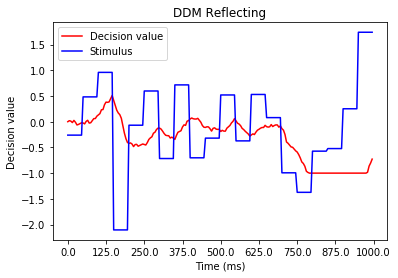

In [8]:
# Defining the values used for this simulation
bound = 1
bound1 = -1
sigma_s = 0.25
mu = 0.1
# The starting decision value will be 0:
x = 0
decision_value = [x]
iterations = 0
xi_s = np.random.randn(1)
stimulus_value = [xi_s]
# The process will be repeated two hundred times (1 second stimulus)
for i in range(199):
    iterations += 1    
    if iterations == 10:
        # Normal random distribution noise:
        xi_s = np.random.randn(1)
        iterations = 0
    stimulus_value.append(xi_s)
    xi_i = np.random.randn(1)
    x = x - (tf/tau)*(-mu)+np.sqrt(tf/tau)*(sigma_i*xi_i+sigma_s*xi_s)
    # If the bound is exceeded, it will return the value of the bound
    if x> bound:
        decision_value.append(bound)
    elif x < bound1:
        decision_value.append(bound1)
    else:
        decision_value.append(x)
# Plotting the decision value over time:
plt.plot(np.arange(0,200,1),decision_value,"r",label = "Decision value")         
plt.plot(np.arange(0,200,1),stimulus_value,"b",label = "Stimulus")         
plt.title("DDM Reflecting")
plt.xlabel("Time (ms)")
positions = [200/8*n for n in range(9)]
labels = [1000/8*n for n in range(9)]
plt.xticks(positions, labels)
plt.ylabel("Decision value")
plt.legend()

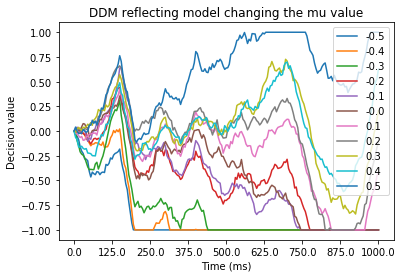

In [9]:
# Defining the values used for this simulation
sigma_s = 0.25
start_mu = -0.5
final_mu = 0.6
step = 0.1
per_error_list = []
# The mu value will be varied from the start mu value to the final mu value, separated by the step value:
for mu in np.arange(start_mu, final_mu, step):
    # In this error_list, 0 will be stored if the sign of the mu value and the decision making are equal, and 1 will be stored if they are different:
    error_list = []
    for z in range(999):
        # The starting decision value will be 0:
        x = 0
        decision_value = [x]
        iterations = 0
                
        # The process will be repeated two hundred times (1 second stimulus)
        for xi_s in stimulus_value:
            xi_i = np.random.randn(1)
            # Solved differential diffusion equation:
            x = x - (tf/tau)*(-mu)+np.sqrt(tf/tau)*(sigma_i*xi_i+sigma_s*xi_s)
            # If the bound is exceeded, it will return the value of the bound
            if x> bound:
                decision_value.append(bound)
            elif x < bound1:
                decision_value.append(bound1)
            else:
                decision_value.append(x)
        
        # The boolean value of  the decision veing positive or negative will be calculated: 
        positive_decision = decision_value[len(decision_value)-1]>=0
        negative_decision = decision_value[len(decision_value)-1]<0
        positive_mu = mu>=0
        negative_mu = mu<0

        # If the last decision value and the mu have the same sign, there will be no error (0 will be stored), if they are different there will be error (1 will be stored)
        if positive_decision == positive_mu or negative_decision  == negative_mu:
            error_list.append(0)
        else:
            error_list.append(1)
        # Only for one iteration
        if z == 1:
            # Plotting the decision value over time:
            plt.plot(np.arange(0,201,1),decision_value,label = round(mu,2))           
            plt.title("DDM reflecting model changing the mu value")
            plt.xlabel("Time (ms)")
            positions = [200/8*n for n in range(9)]
            labels = [1000/8*n for n in range(9)]
            plt.xticks(positions, labels)
            plt.ylabel("Decision value")
            plt.legend()
    per_error = sum(error_list)/len(error_list)*100
    per_error_list.append(100-per_error)

Text(0.5,1,'Psychometric curve for the DDM Reflecting')

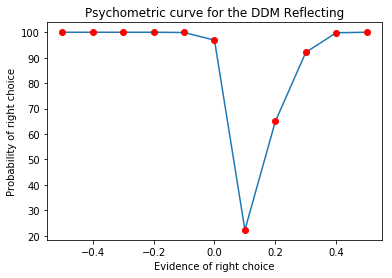

In [10]:
plt.plot(np.arange(start_mu, final_mu, step),per_error_list)
plt.plot(np.arange(start_mu, final_mu, step),per_error_list,"ro")
plt.ylabel("Probability of right choice")
plt.xlabel("Evidence of right choice")
plt.title("Psychometric curve for the DDM Reflecting")


Then mu will be set to a fixed value, and the sigma will be varied. The error percentage will be computed for each sigma (for 1000 iterations).

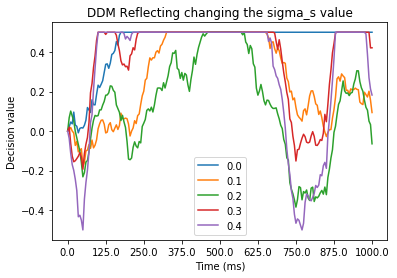

In [25]:
# Defining the values used for this simulation
mu = 0.1
start_sigma_s = 0
final_sigma_s = 0.5
step = 0.1
bound = 0.5
bound1 = -0.5
per_error_list = []
# The mu value will be varied from the start mu value to the final mu value, separated by the step value:
for sigma_s in np.arange(start_sigma_s, final_sigma_s, step):
    # In this error_list, 0 will be stored if the sign of the mu value and the decision making are equal, and 1 will be stored if they are different:
    error_list = []
    for z in range(999):
        # The starting decision value will be 0:
        x = 0
        decision_value = [x]
        iterations = 0

        # The process will be repeated two hundred times (1 second stimulus)
        for xi_s in stimulus_value:

            xi_i = np.random.randn(1)
            # Solved differential diffusion equation:
            x = x - (tf/tau)*(-mu)+np.sqrt(tf/tau)*(sigma_i*xi_i+sigma_s*xi_s)
            # If the bound is exceeded it will return the value of the bound
            if x> bound:
                decision_value.append(bound)
            elif x < bound1:
                decision_value.append(bound1)
            else:
                decision_value.append(x)
        
        # The boolean value of  the decision veing positive or negative will be calculated: 
        positive_decision = decision_value[len(decision_value)-1]>=0
        negative_decision = decision_value[len(decision_value)-1]<0
        positive_mu = mu>=0
        negative_mu = mu<0

        # If the last decision value and the mu have the same sign, there will be no error (0 will be stored), if they are different there will be error (1 will be stored)
        if positive_decision == positive_mu or negative_decision  == negative_mu:
            error_list.append(0)
        else:
            error_list.append(1)
        # Only for one itration
        if z == 1:
            # Plotting the decision value over time:
            plt.plot(np.arange(0,201,1),decision_value,label = round(sigma_s,2))           
            plt.title("DDM Reflecting changing the sigma_s value")
            plt.xlabel("Time (ms)")
            positions = [200/8*n for n in range(9)]
            labels = [1000/8*n for n in range(9)]
            plt.xticks(positions, labels)
            plt.ylabel("Decision value")
            plt.legend()
    per_error = sum(error_list)/len(error_list)*100
    per_error_list.append(100-per_error)
    #print("The incorrect decision is made", round(per_error,2), "% of the times for the sigma s value = ", round(sigma_s,3))

ValueError: x and y must have same first dimension, but have shapes (5,) and (11,)

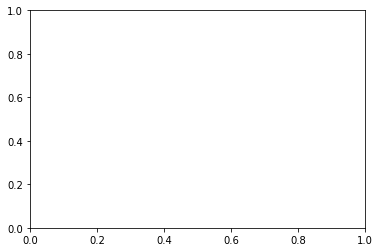

In [33]:
plt.plot(np.arange(start_sigma_s, final_sigma_s, step),per_error_list)
plt.ylabel("Accuracy (%)")
plt.xlabel("sigma_s value")
plt.title("Accuracy over sigma_s value for the DDM Reflecting model")